# AlertAI - Algorithms 
This notebook is responsible for the development the algorithms that will detect the anomalies in the data.
Last task of the pipeline of AlertAI component in RideCare Project.

#### by PEILoad

### The steps of this task are:
1. Import Required Libraries 
2. Acquire the Data
3. Supervised Learning

    3.1 Algorithm A

            a. Data preparation for the input

            b. Model Training

            c. Output results

4. Unsupervised Learning

    4.1 Algorithm B

            a. Data preparation for the input

            b. Model Training

            c. Output results

5. Model Export
6. Conclusions and Validation

## 1. Import Libraries
This section, as name says, is destined to import the libraries that will be used in the file.

In [1]:
import keras
from keras.utils import np_utils, get_file
import numpy as np
import pandas as pd
import tensorflow as tf
from matplotlib import pyplot as plt

Using TensorFlow backend.


## 2. Data Acquisition
Step corresponding to gather the Data in order to manipulate it later on.

In [2]:
#dataset1 = pd.read_csv("data/sensor1_raw.csv")
#dataset2 = pd.read_csv("data/sensor2_raw.csv")

data = pd.read_csv("data/raw_data.csv")

X = data[['sensors.pm25','sensors.pm10','sensors.temperature', 'sensors.gas', 'sensors.humidity', 'sensors.pressure', 'sensors.altitude']]
y = data[['sensors.classification']]

print(X.shape)
print(y.shape)

#sklearn para dividir os dados de treino e de teste
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

(463, 7)
(463, 1)


## 3. Supervised Learning
Where the "magic" happens!
Section where the data will be cleaned and ready to fill de model.

### 3.1 Algoritmo "SVM (Support Vector Machine)"
Nota: Utilizando "kernel" porque penso que os dados não sejam linearmente separáveis

#### a. Data preparation for input

#### b. Model Trainig

In [7]:
#SVC - Support Vector Classifier class (Scikit-Learn's svm library).
from sklearn.svm import SVC

#Polinomial 'poly & degree', Gaussian Kernel 'rbf', Sigmoid Kernel 'sigmoid'. 
svcclassifier = SVC(kernel = 'poly', degree = 6)
svcclassifier.fit(X_train, y_train)

y_pred = svcclassifier.predict(X_test)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


#### c. Output results

In [9]:
from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[  0 134]
 [  0   5]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       134
           1       0.04      1.00      0.07         5

    accuracy                           0.04       139
   macro avg       0.02      0.50      0.03       139
weighted avg       0.00      0.04      0.00       139



/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


### 3.2 Algoritmo "Neural Networks"
Nota: Versão muito muito simples e inicial

#### a. Data preparation for input

#### b. Model Trainig

In [ ]:
#Camadas do modelo
model = keras.Sequential([
    keras.layers.Dense(128, activation = 'relu'), #camada com 128 nodos
    keras.layers.Dense(7, activation = 'softmax') #x nodos = retorna array com x probabilidades - cada nó contém um valor que indica a prob de aquela imagem pertencer a uma das x classes
    #...
])

#Compilar o modelo
model.compile(optimizer = 'adam',
             loss = 'sparse_categorical_crossentropy',
             metrics = ['accuracy'])

#Treinar o modelo
epochs = 30
batch_size = 32
model.fit(X_train, y_train, validation_data = (X_test, y_test), epochs = epochs, batch_size = batch_size, verbose = 2) 
#primeira var - valores de treino, segunda var - respetivas labels

#### c. Output results

In [ ]:
#primeira var - valores de teste
#segunda var - respetivas labels
test_loss, test_acc = model.evaluate(X_test, y_test, verbose = 2)
scores = model.evaluate(X_test, y_test, verbose = 0)

print('Scores: ', scores)
print('Accuracy: ', test_acc)
print('Erro modelo: %.2f%%' % (100-scores[1]*100))

### 3.3 Algoritmo "Naive Bayes"

#### a. Data preparation for input

#### b. Model Trainig

In [ ]:
#Estatisticas train set
means = X_train.groupby(y_train).apply(np.mean)
stds = X_train.groupby(y_train).apply(np.std)

#Probabilidades
probs = X_train.groupby(y_train).apply(lambda x: len(x)) / X_train.shape[0]

#Bayesian Theorem - para cada elemento, calcular a probabilidade de pertencer a cada classificação
y_pred = []
#para cada elemendo do set de validação 
for elem in range(X_test.shape[0]):
    p = {}
    #para cada class possivel
    for c1 in np.unique(y_train):
        #fica com a prior probabilidade da class dada
        p[c1] = probs.iloc[c1]
        
        #para cada coluna dos dados
        for index, param in enumerate(X_test.iloc[elem]):
            #multiplica pelo prob do valor da coluna dada pertencer à distribuição da coluna de treino da class dada
            p[c1] *= norm.pdf(param, means.iloc[c1, index], stds.iloc[c1, index])
    
    y_pred.append(pd.Series(p).values.argmax())
    

#### c. Output results

In [ ]:
#my classifier
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

#GaussianNB classifier from the sklearn classifier
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X_train, y_train)

accuracy_score(y_test, model.predict(X_test))

### 3.4 Algoritmo "Decision Trees/Random Forest"

#### a. Data preparation for input

#### b. Model Trainig

In [ ]:
#Utlizando o modelo Random Forest
from sklearn.ensemble import RandomForestRegressor

#Instanciar o modelo com 1000 decision trees
rf = RandomForestRegressor(n_estimators = 1000, random_state = 42) #random_state: "the results will be the same each time I run the split for reproducible results"

#Treinar o modelo
rf.fit(X_train, y_train)


#Fazer previsões
p = rf.predict(X_test)
#Calcular erros abs
errors = abs(p - y_test)
print('Mean Absolute Error:', round(np.mean(errors),2), 'degrees.')


#### c. Output results

In [ ]:
#Calcular MAPE (mean absolute percentage error)
mape = 100 * (errors / y_test)

#Accuracy
acc = 100 - np.mean(mape)
print('Accuracy:', round(accuracy,2), '%.')

## 4. Unsupervised Learning
Nota: Nestes casos não existe 'classificação' por serem modelos não supervisionados

### 4.1 Algoritmo "K-means clustering"

#### a. Data preparation for input

#### b. Model Trainig

In [7]:
from sklearn.cluster import KMeans

n_clusters = 2

model = KMeans(algorithm = 'auto', init = 'k-means++', max_iter = 500, n_init= 10, n_clusters = n_clusters, verbose = 0) #Para já vou colocar 2, de existência e não existência de fumo
model.fit(X_train)
y_labels_train = model.labels_
y_labels_test = model.predict(X_test)

print(y_labels_test)

[0 1 1 0 1 0 0 0 0 1 1 0 0 0 1 0 0 0 0 1 0 1 0 1 0 0 0 0 0 0 1 0 0 0 1 0 0
 0 0 1 1 1 1 1 0 0 1 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 1 0 1 1 0 0 1 0 1
 0 0 0 1 1 1 0 1 0 0 1 0 0 0 0 1 0 1 0 0 0 0 0 0 1 1 0 0 0 1 1 0 1 0 1 1 1
 1 1 1 0 0 0 1 0 0 0 0 1 1 1 1 0 0 1 0 1 0 0 1 0 0 1 0 0]


#### c. Output results

[0 1 0 0 1 1 1 0 0 0 1 0 0 1 0 1 0 1 1 1 0 0 0 1 1 0 0 0 1 1 1 0 1 0 1 0 0
 1 0 0 1 0 1 0 1 0 0 0 1 0 0 1 0 0 1 1 0 0 0 0 1 1 0 1 0 1 0 0 0 0 1 1 1 0
 0 0 0 1 1 1 0 1 0 0 1 1 0 0 0 1 0 0 0 0 0 0 1 1 1 1 0 1 0 0 0 0 0 0 1 1 1
 1 0 0 0 0 1 0 1 1 0 0 1 0 0 0 1 1 1 0 1 0 0 1 0 0 1 1 0 0 0 1 0 0 0 1 1 1
 0 0 1 0 1 0 0 0 1 1 0 0 1 1 0 1 0 0 1 0 1 0 0 1 0 0 0 1 0 0 1 0 0 0 1 1 1
 1 1 0 0 1 0 0 1 0 1 1 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 1 1 1 0 0
 0 0 1 1 0 1 0 0 1 0 1 1 1 0 0 0 0 0 1 0 0 0 1 1 1 0 0 0 1 1 0 1 1 1 0 1 0
 1 1 0 0 0 0 0 0 0 1 0 0 1 0 0 1 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1
 0 1 0 0 0 1 1 1 1 0]
[[ 9.24054054e+00  1.64021622e+01  2.50144679e+01  3.06211730e+04
   3.56927248e+01  1.01416421e+03 -7.23069712e+00]
 [ 5.44545455e+00  8.33636364e+00  1.65636777e+01  5.34419091e+04
   5.18537449e+01  9.74538027e+02  3.27409662e+02]]


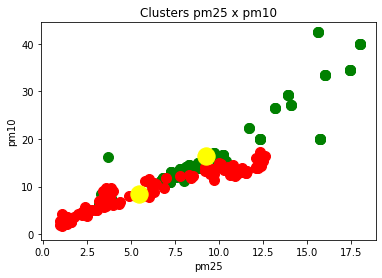

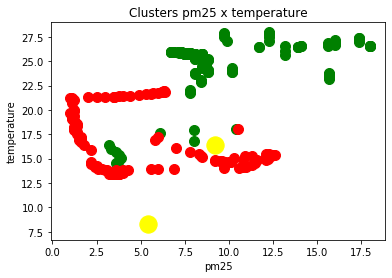

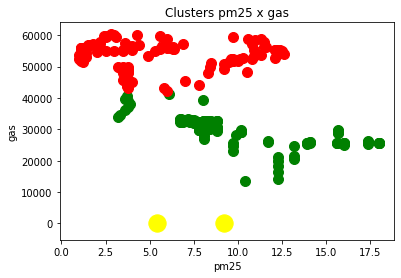

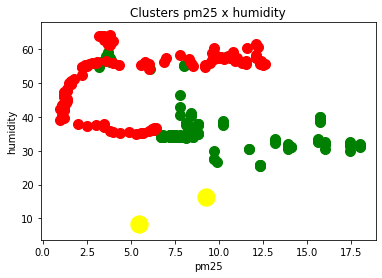

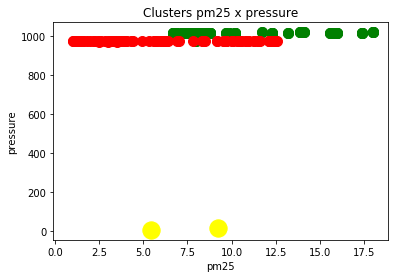

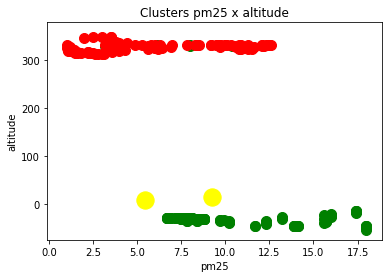

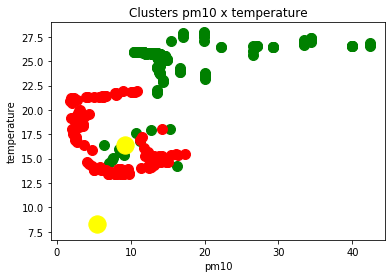

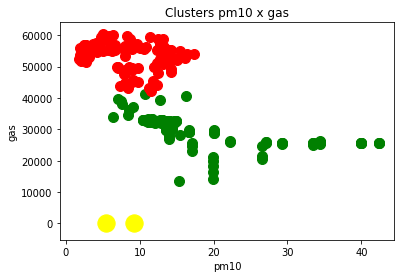

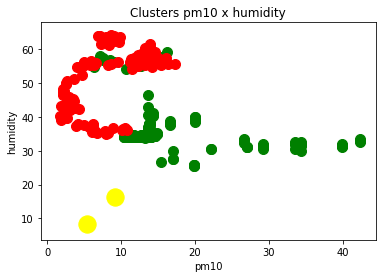

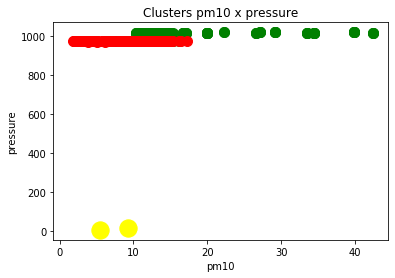

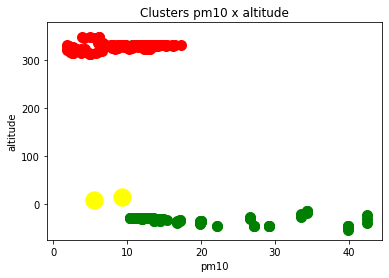

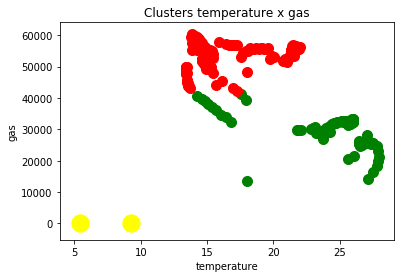

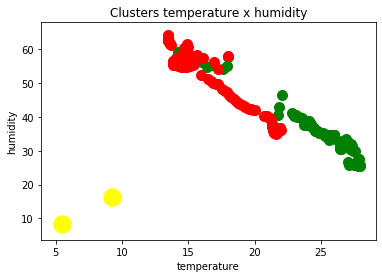

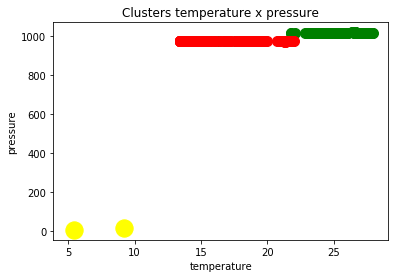

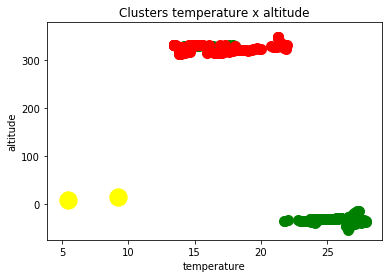

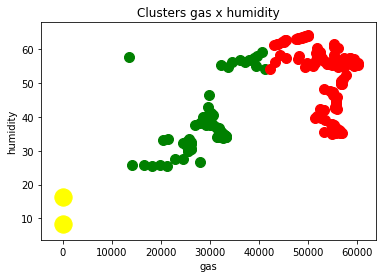

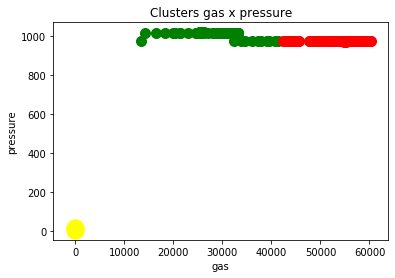

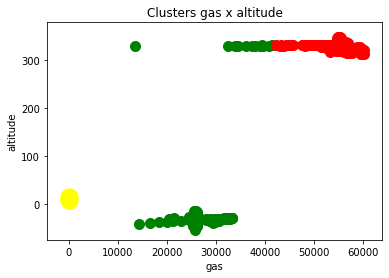

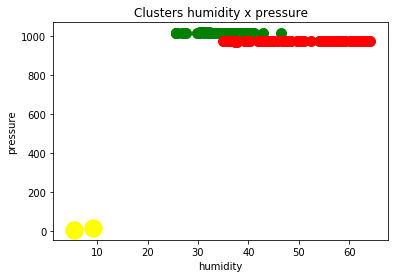

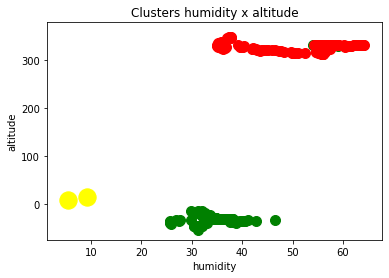

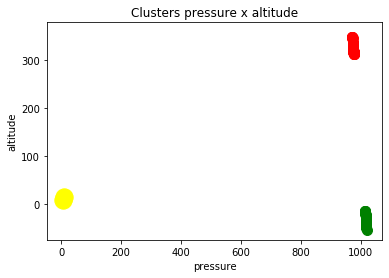

In [6]:
print(model.labels_) #prever a que cluster cada ponto pertence
print(model.cluster_centers_) #para ver onde é o centro de cada cluster

#Labels
for c1, col1 in enumerate(X_train.columns):
    for c2, col2 in enumerate(X_train.columns):
        if( c1 >= c2):
            ;
        else:
            plt.scatter(X_train[model.labels_ == 0][col1], X_train[model.labels_ == 0][col2], s = 100, c = 'green', label = 'Cluster 0')
            plt.scatter(X_train[model.labels_ == 1][col1], X_train[model.labels_ == 1][col2], s = 100, c = 'red', label = 'Cluster 1')
            plt.scatter(model.cluster_centers_[:, 0], model.cluster_centers_[:, 1], s=300, c='yellow', label = 'Centroids')
            plt.title('Clusters ' + str(col1) + ' x ' + str(col2))
            plt.xlabel(col1)
            plt.ylabel(col2)
            plt.show()

### 4.2 Algoritmo "Local Outlier factor"

#### a. Data preparation for input

#### b. Model Trainig

In [19]:
from sklearn.neighbors import LocalOutlierFactor

n_neighbors = 20 #no sklearn diz que 20 é no geral um valor bom, mas podemos otimizar depois
metric = 'manhattan' #Euclid, Minkowski, Manhattan

model = LocalOutlierFactor(n_neighbors = n_neighbors, metric = metric, contamination = 0.1)
y_pred = model.fit_predict(X_train)
X_scores = model.negative_outlier_factor_ #Negative LOF score

#### c. Output results

[ -1.07593723  -1.02233586  -1.29540196  -1.20840264  -1.37990114
  -1.27692337  -1.11971709  -0.97581146  -1.06259662  -0.99265821
  -0.98578531  -1.00220796  -1.00341705  -1.25420396  -1.05126587
  -1.09051464  -1.01081068  -1.2931642   -1.01251856  -0.97104036
  -1.00359276  -5.31764222  -1.00769234  -0.95993526  -1.01075399
  -1.00891315  -1.02813077  -0.99013136  -1.36008168  -1.01485927
  -1.09030449  -0.98120327  -1.0338398   -1.46229091  -1.16634436
  -1.12568342  -1.22865454  -1.00860568  -0.948285    -2.0834708
  -2.22566592  -1.12225884  -1.0350066   -1.04468515  -1.00219866
  -0.9812195   -0.97987062  -1.77314651  -0.99926041  -2.93201076
  -1.28852504  -1.00398228  -0.9762997   -1.01847244  -0.9899374
  -1.02374277  -0.9902571   -1.04664199  -2.51328284  -0.9909687
  -0.99187079  -1.1863426   -1.26598039  -1.4619331   -1.0290059
  -0.98809708  -1.92951412  -1.04916132  -1.06922328  -1.45306266
  -1.03648339  -1.0109078   -1.30751115  -1.29384105  -1.43412079
  -0.98162135 

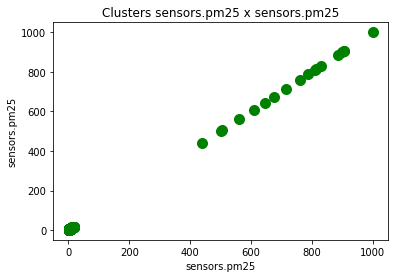

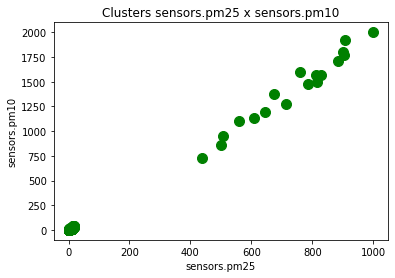

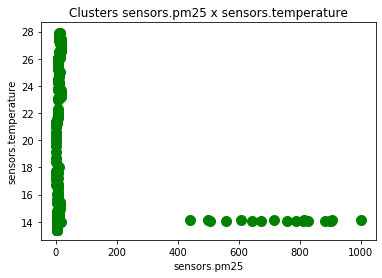

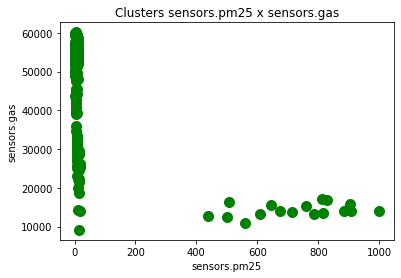

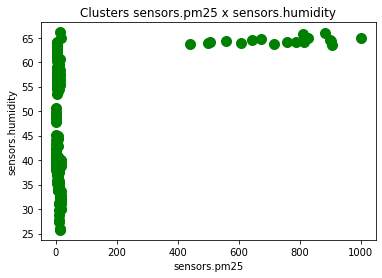

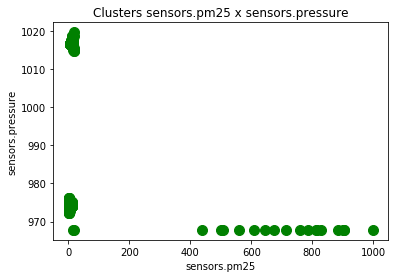

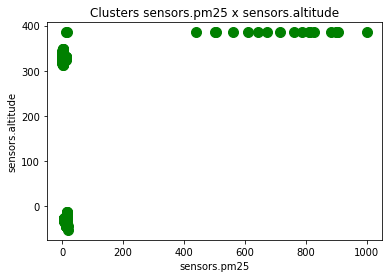

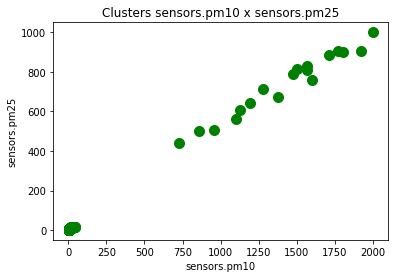

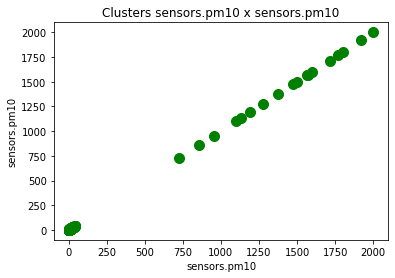

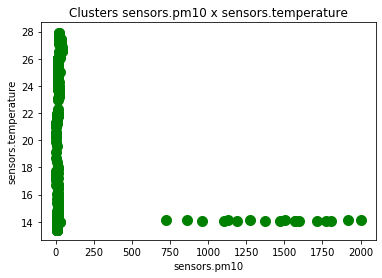

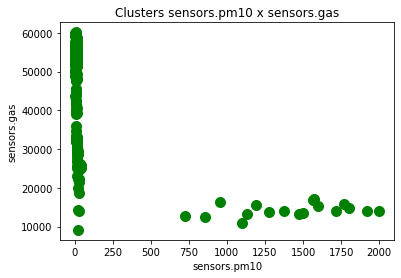

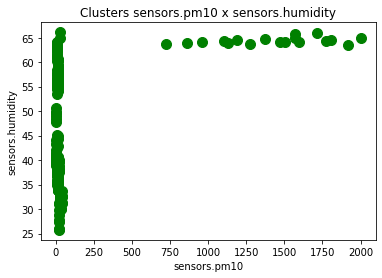

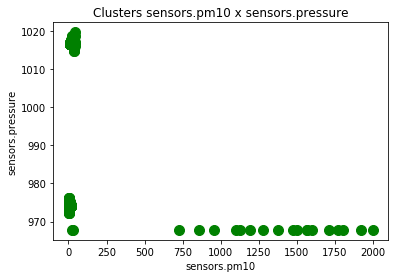

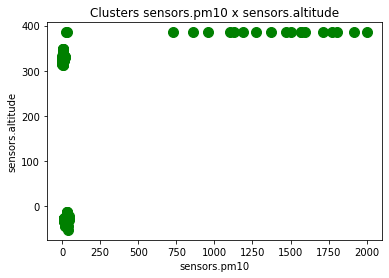

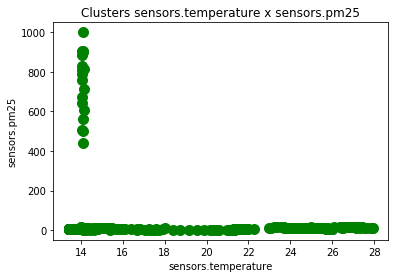

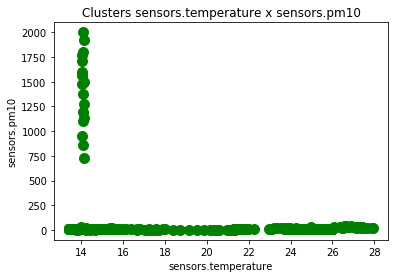

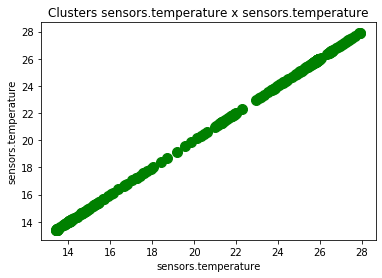

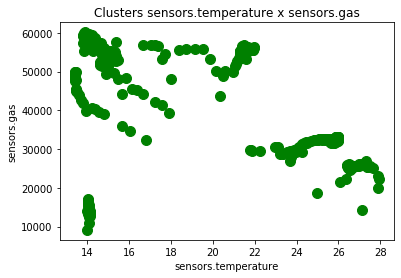

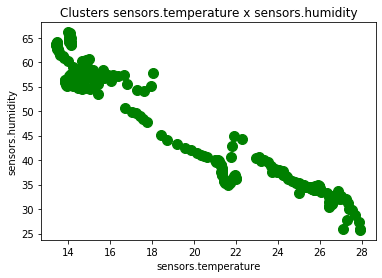

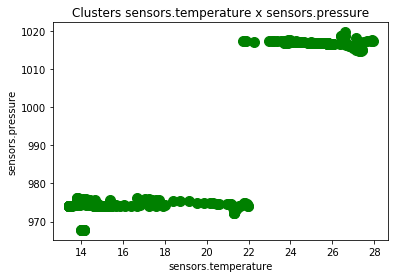

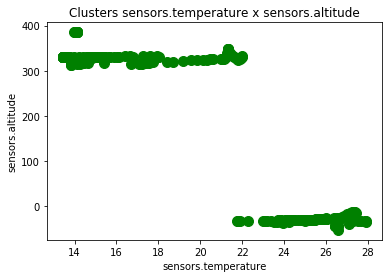

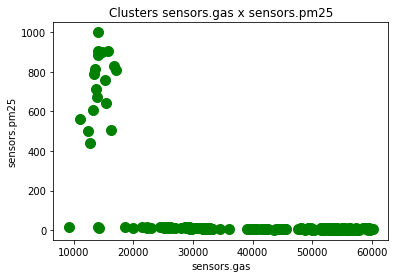

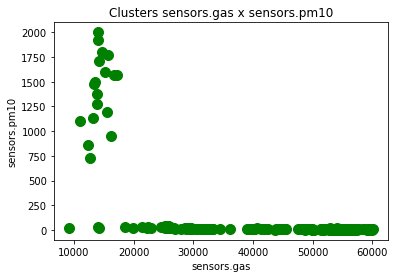

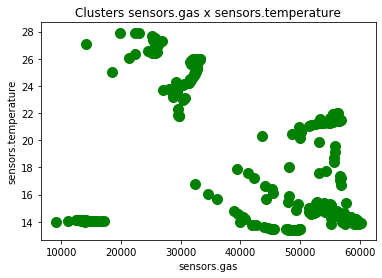

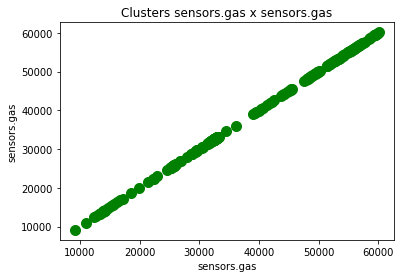

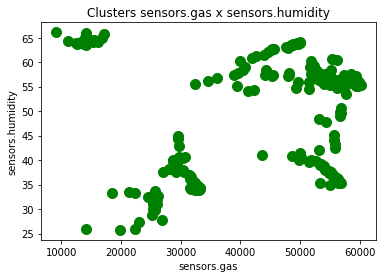

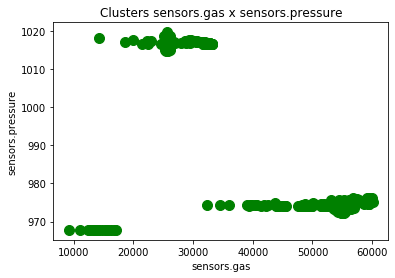

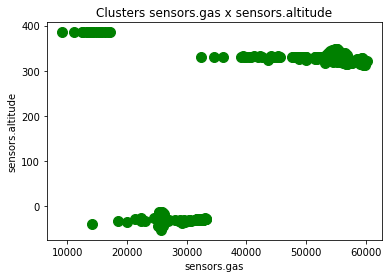

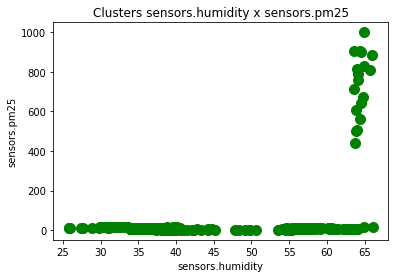

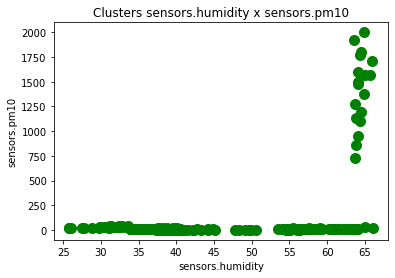

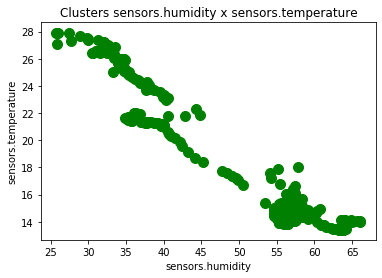

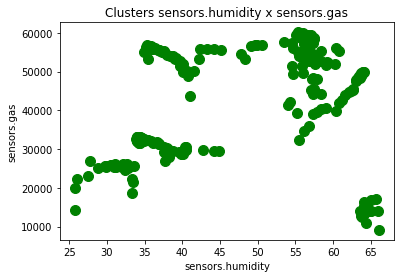

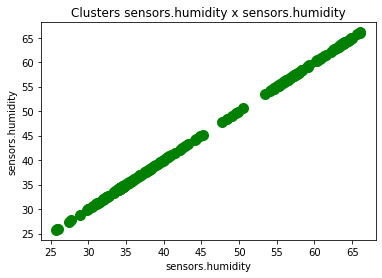

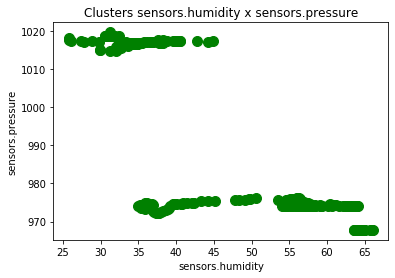

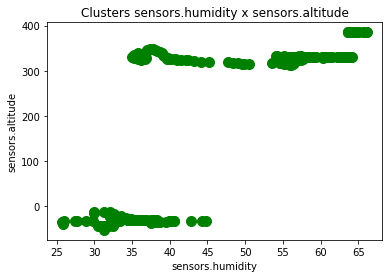

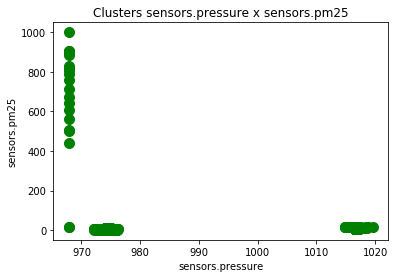

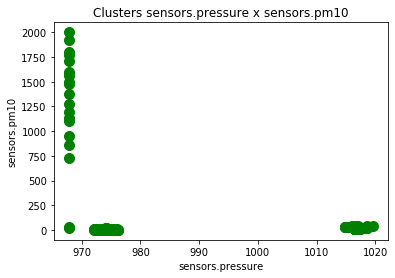

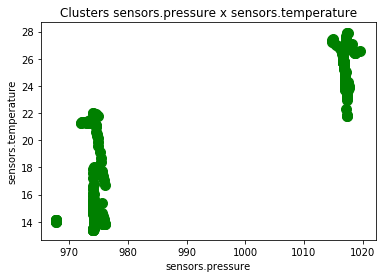

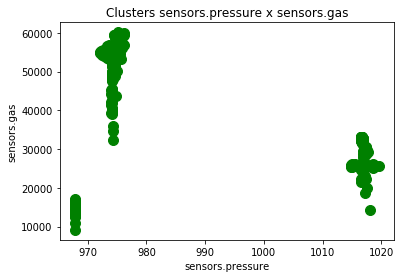

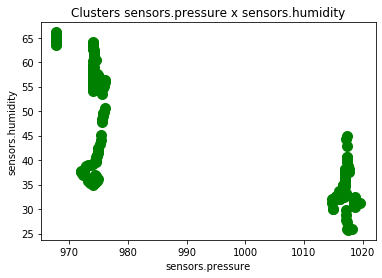

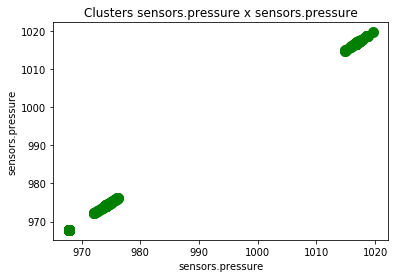

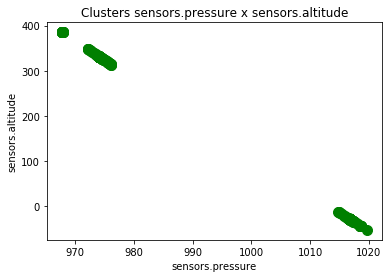

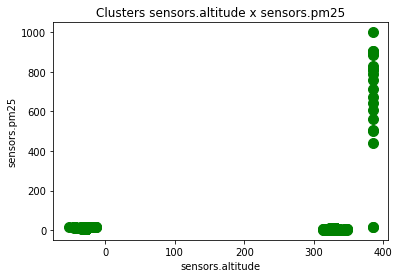

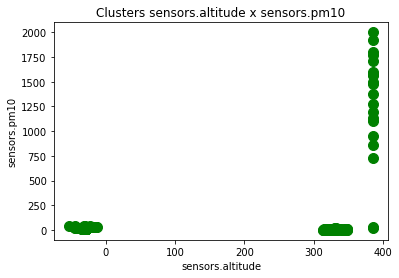

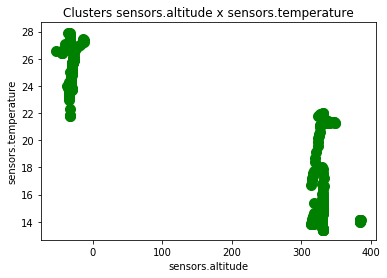

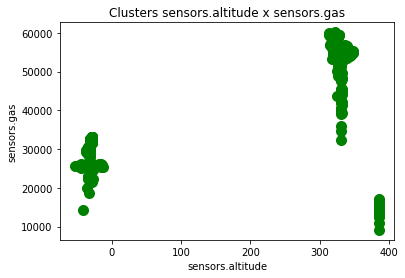

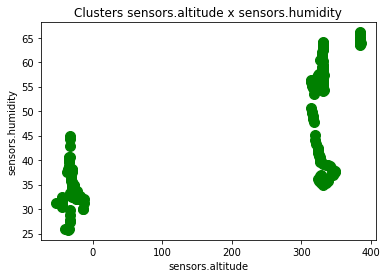

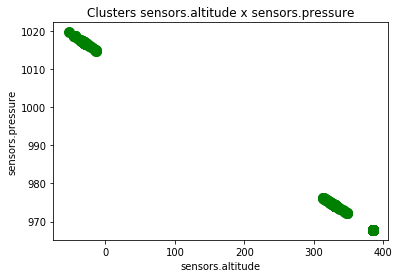

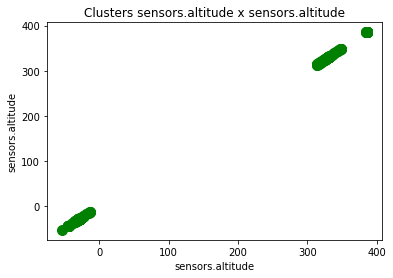

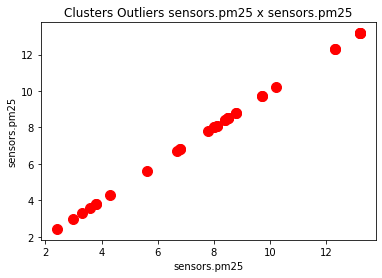

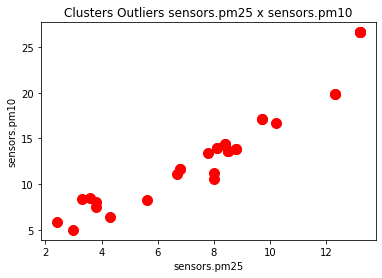

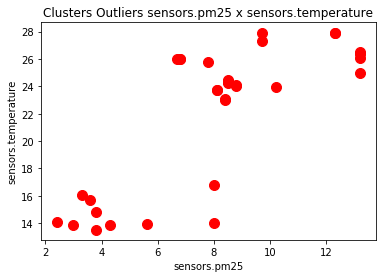

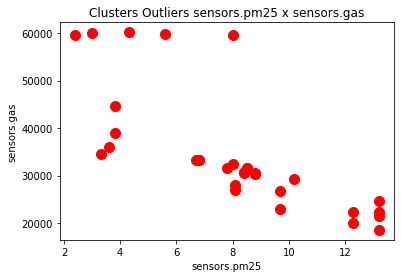

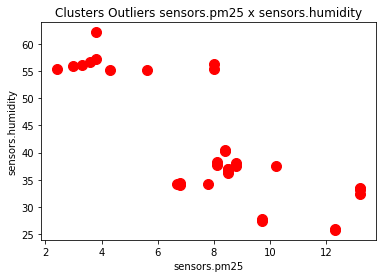

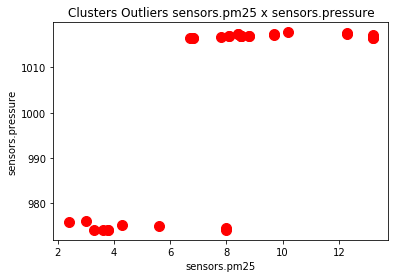

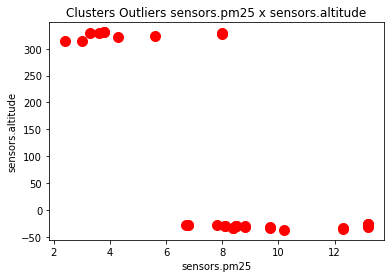

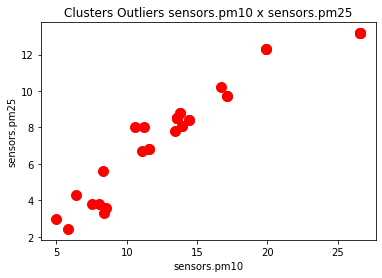

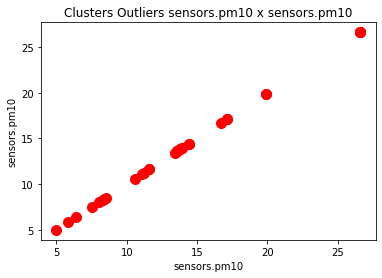

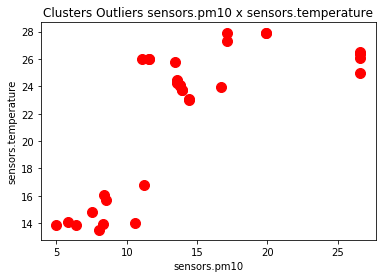

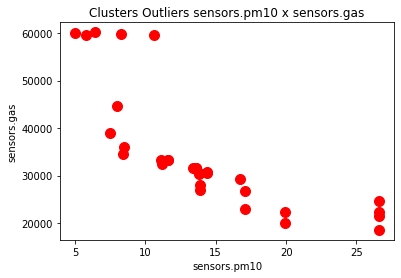

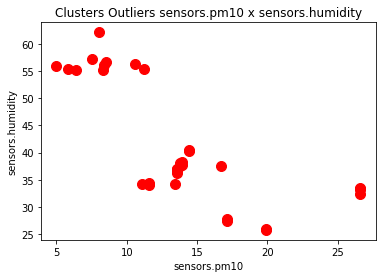

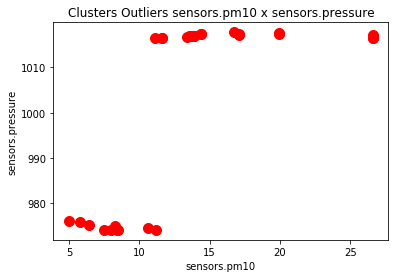

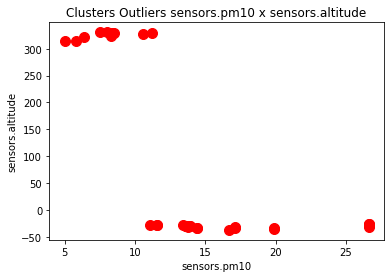

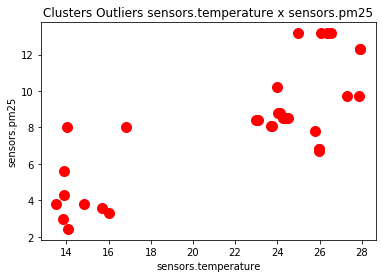

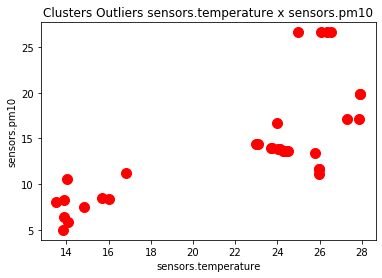

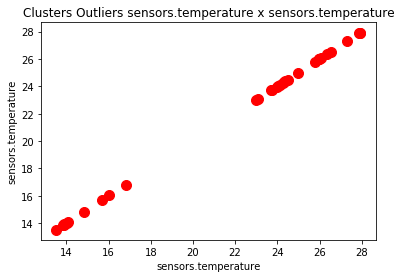

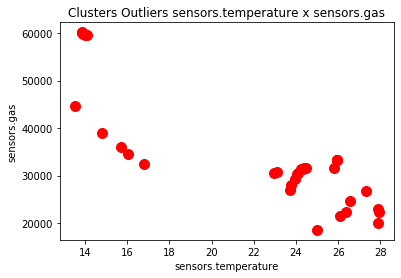

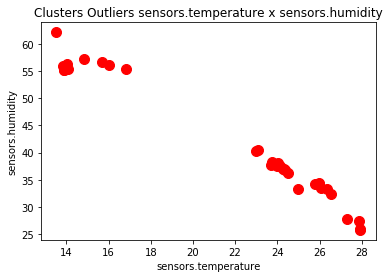

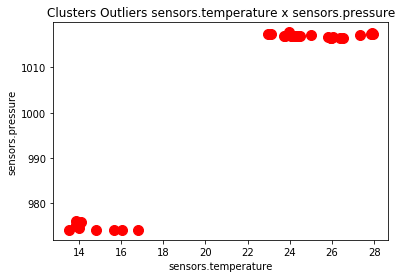

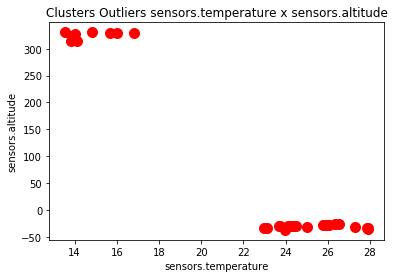

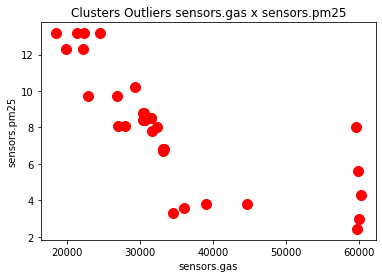

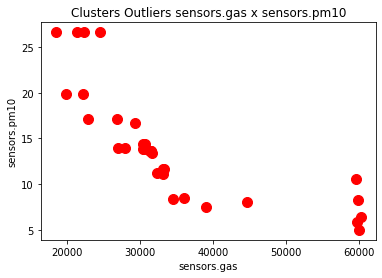

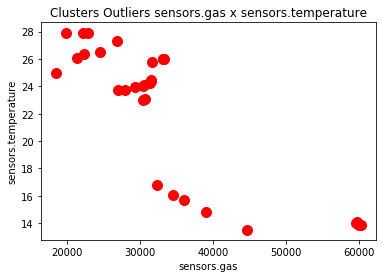

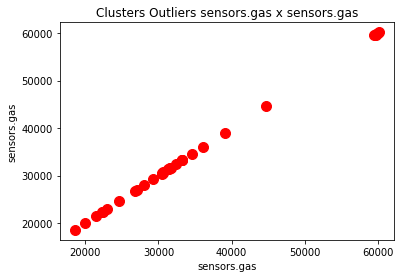

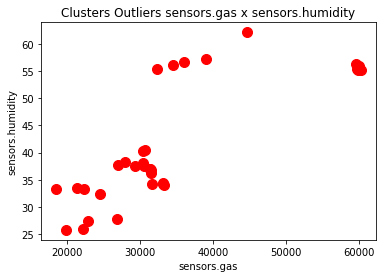

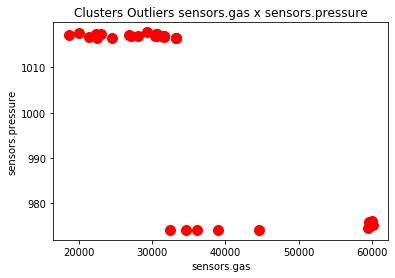

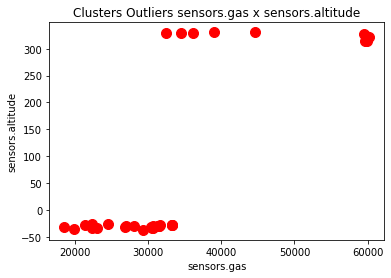

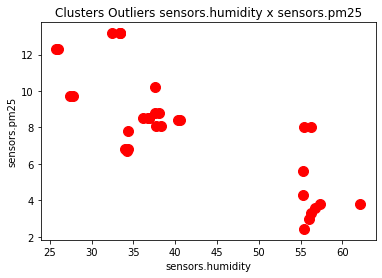

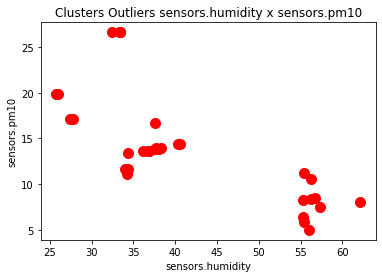

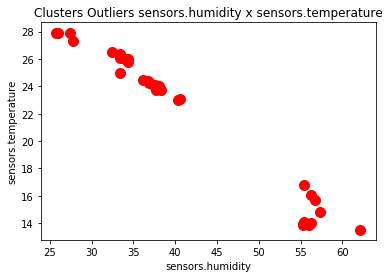

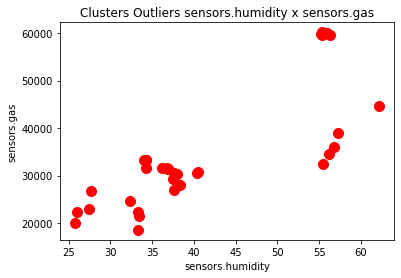

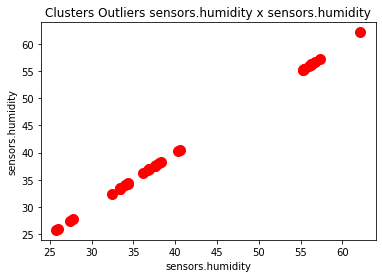

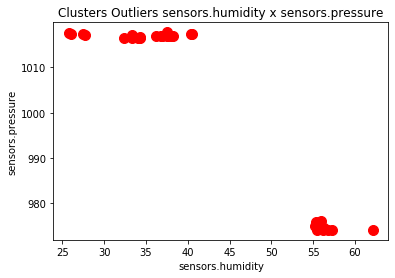

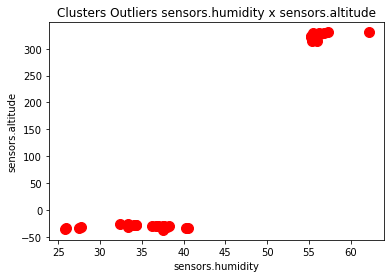

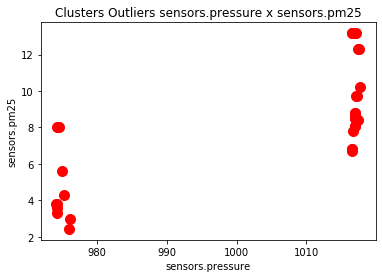

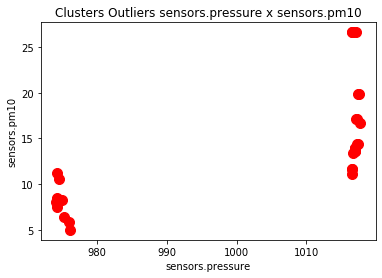

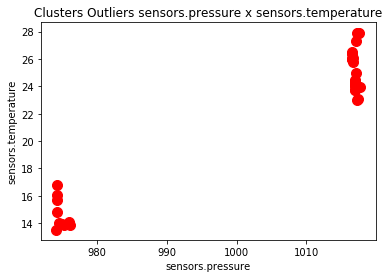

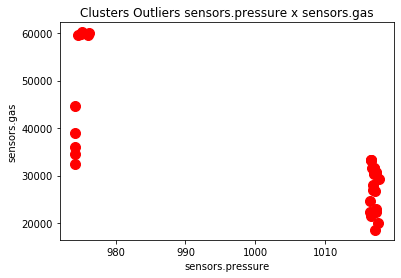

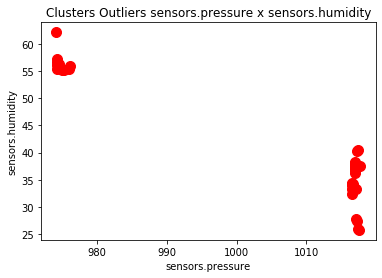

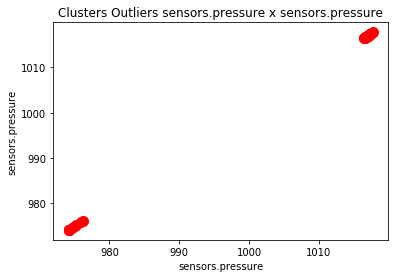

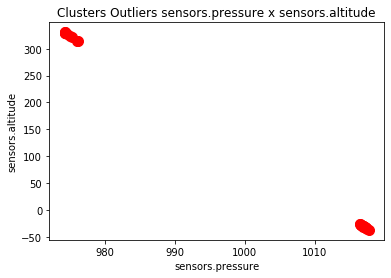

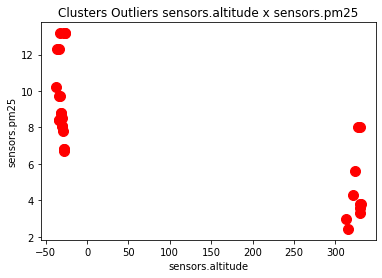

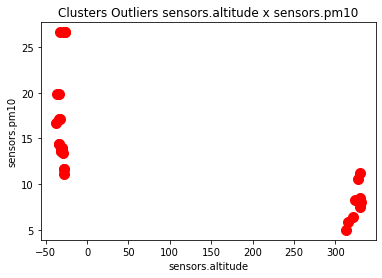

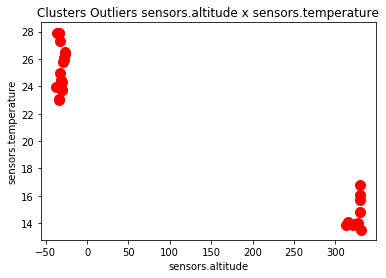

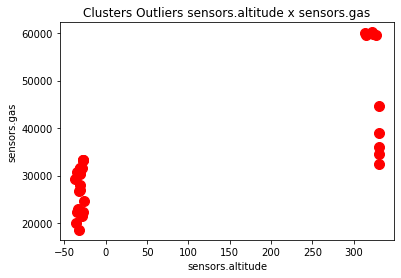

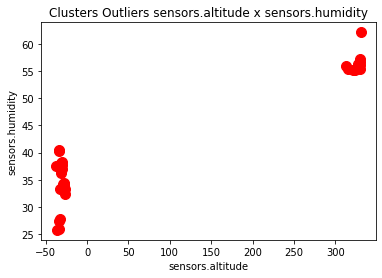

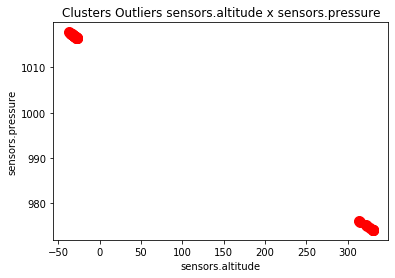

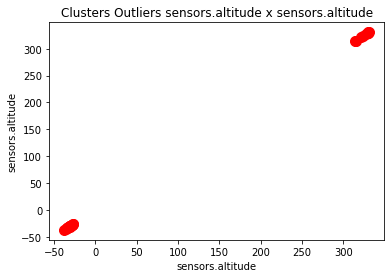

In [20]:
#Notas:
#LOF(k) ~ 1 means Similar density as neighbors.
#LOF(k) < 1 means Higher density than neighbors (Inlier/not an outlier).
#LOF(k) > 1 means Lower density than neighbors (Outlier)

print(X_scores)
print(y_pred) #1 - inlier / -1 outlier

#Filtro dos outliers (valores negativos)
outlier_index = np.where(y_pred == -1)
outlier_values = X_train.iloc[outlier_index]
print("----------------------------------------")
print(outlier_index)
print("----------------------------------------")

#Plot dos dados
for c1, col1 in enumerate(X_train.columns):
    for c2, col2 in enumerate(X_train.columns):
        plt.scatter(X_train[col1], X_train[col2], s = 100, c = 'green', label = 'Cluster dados')
        plt.title('Clusters ' + str(col1) + ' x ' + str(col2))
        plt.xlabel(col1)
        plt.ylabel(col2)
        plt.show()

#Plot Outliers Values
for c1, col1 in enumerate(X_train.columns):
    for c2, col2 in enumerate(X_train.columns):
        plt.scatter(outlier_values[col1],outlier_values[col2], s = 100, c = 'r', label = 'Cluster Outliers')
        plt.title('Clusters Outliers ' + str(col1) + ' x ' + str(col2))
        plt.xlabel(col1)
        plt.ylabel(col2)
        plt.show()

### 4.3 Algoritmo "Isolation Forest"

#### a. Data preparation for input

#### b. Model Trainig

In [55]:
from sklearn.ensemble import IsolationForest

model = IsolationForest(n_estimators = 100, max_samples = 'auto', contamination = 0.1, max_features = 7)
#n_estimatores = 100 por default; max_features = "It is the number of features to draw from the total features to train each base estimator or tree"
model.fit(X_train)

scores = model.decision_function(X_train)
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

print(y_pred_train)
print(y_pred_test)
#anomalias = -1

/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/iforest.py:247: FutureWarning: behaviour="old" is deprecated and will be removed in version 0.22. Please use behaviour="new", which makes the decision_function change to match other anomaly detection algorithm API.
  FutureWarning)


[ 1  1  1  1  1  1  1  1  1 -1  1  1  1  1  1  1 -1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1 -1  1  1  1 -1  1  1  1 -1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1 -1  1  1  1  1  1  1  1  1  1 -1 -1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1 -1 -1  1  1  1  1  1  1  1  1
  1  1 -1 -1 -1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1 -1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1 -1  1
  1  1  1 -1  1 -1 -1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1 -1  1  1 -1  1  1  1 -1  1  1  1  1
  1 -1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1 -1  1 -1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1 -1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1 -1 -1  1  1  1  1  1
  1  1  1  1  1  1  1  1 -1  1 -1  1  1  1  1  1  1 -1  1  1  1  1  1  1
  1  1  1  1 -1  1 -1  1  1  1 -1  1]
[ 1  1  1  1 

/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/iforest.py:415: DeprecationWarning: threshold_ attribute is deprecated in 0.20 and will be removed in 0.22.
  " be removed in 0.22.", DeprecationWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/iforest.py:415: DeprecationWarning: threshold_ attribute is deprecated in 0.20 and will be removed in 0.22.
  " be removed in 0.22.", DeprecationWarning)


#### c. Output results

(array([  9,  16,  51,  55,  59,  79,  89,  90, 110, 111, 122, 123, 124,
       140, 166, 171, 173, 174, 204, 207, 211, 217, 234, 236, 262, 281,
       282, 296, 298, 305, 316, 318, 322]),)
Accuracy: 0.8776978417266187


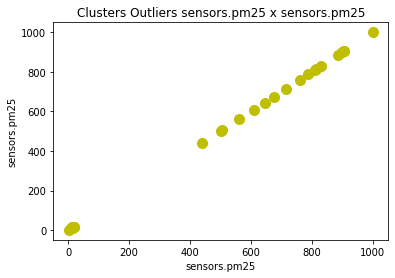

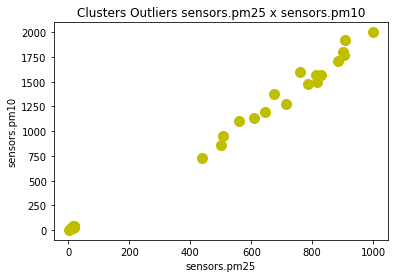

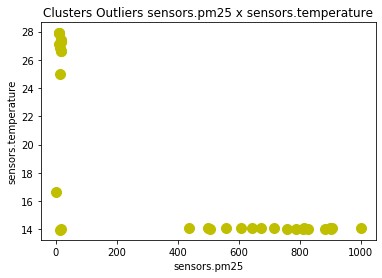

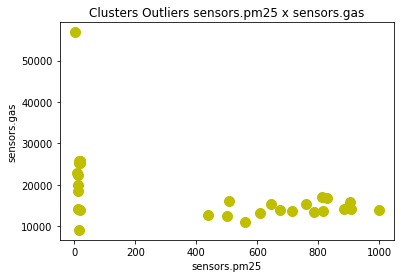

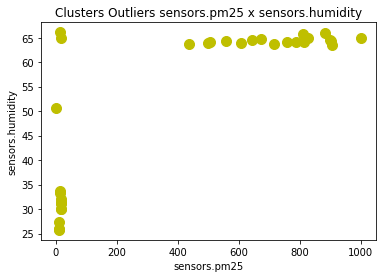

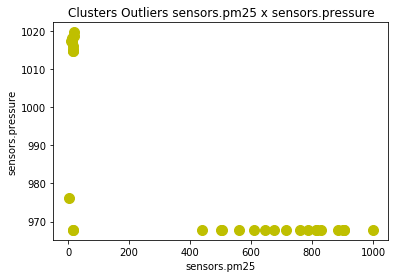

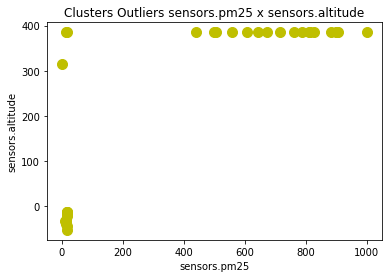

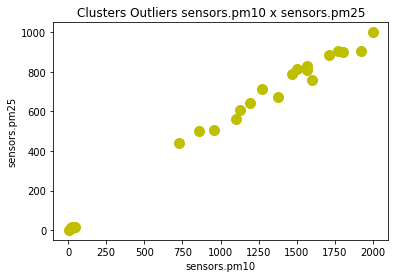

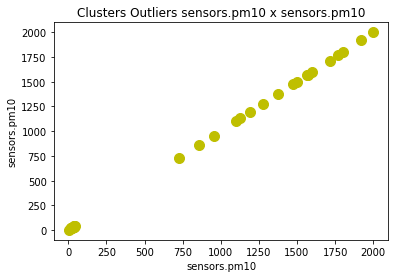

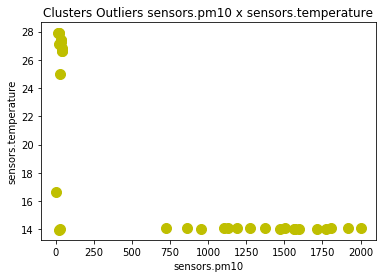

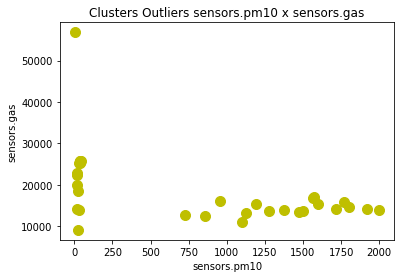

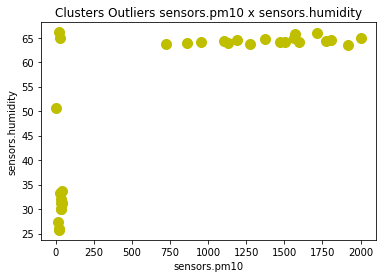

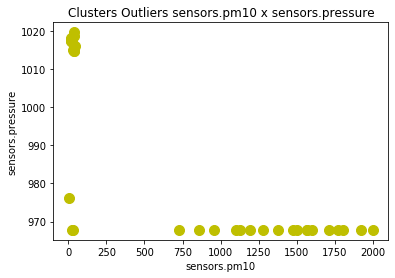

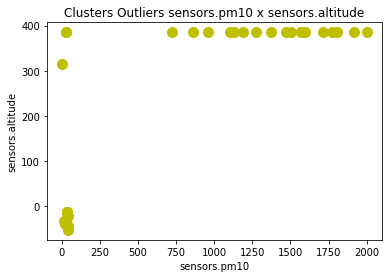

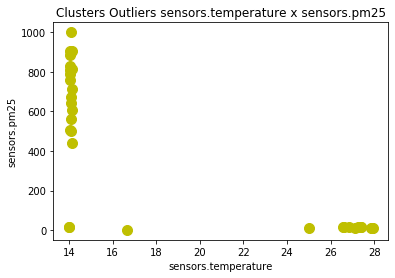

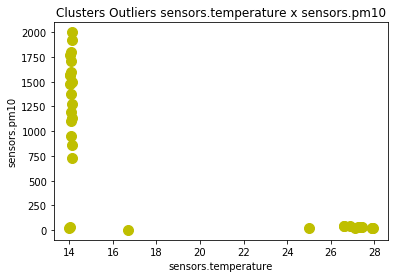

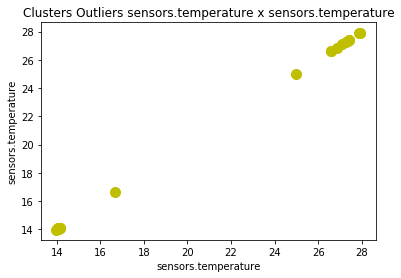

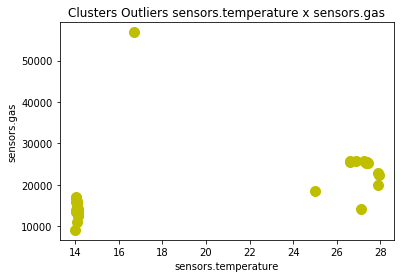

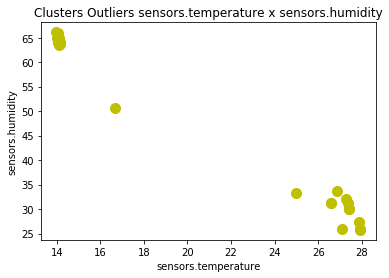

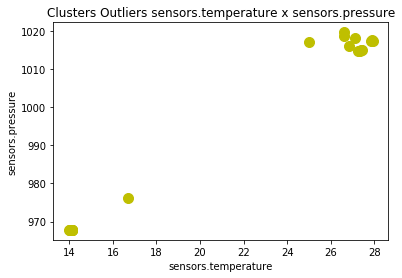

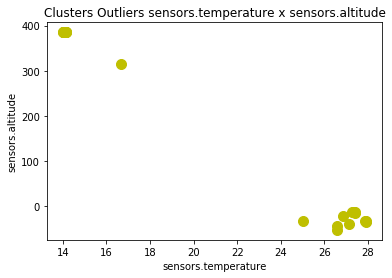

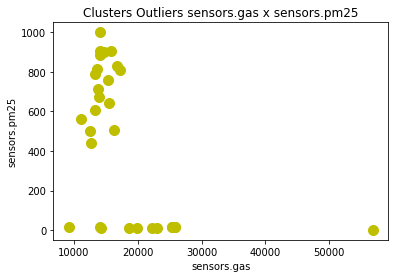

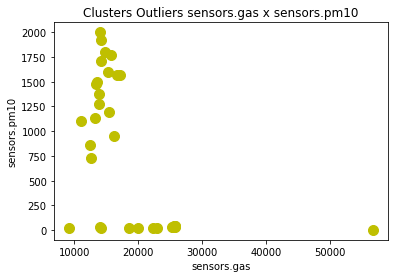

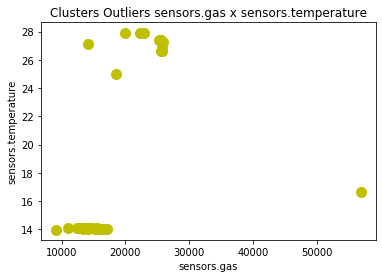

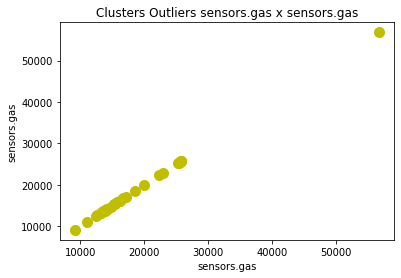

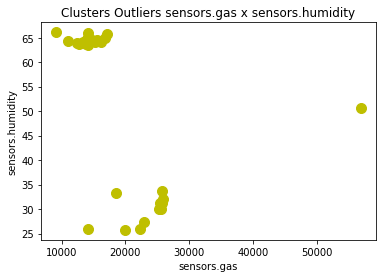

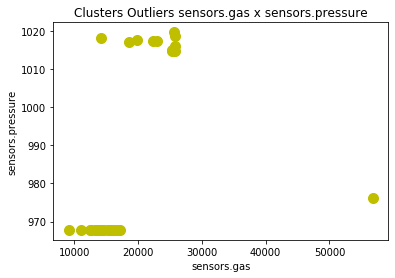

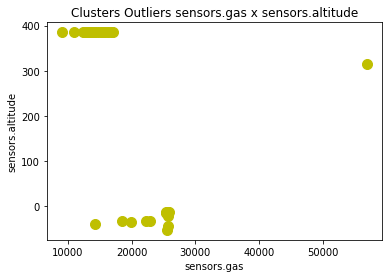

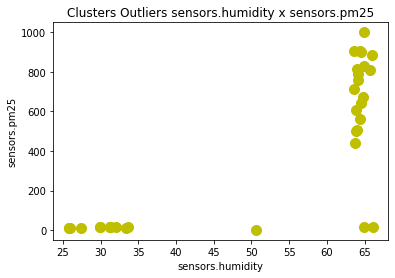

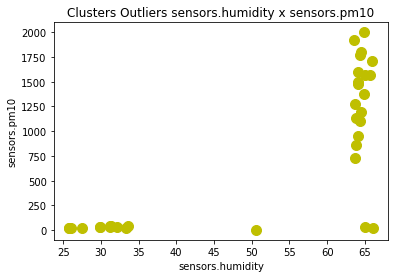

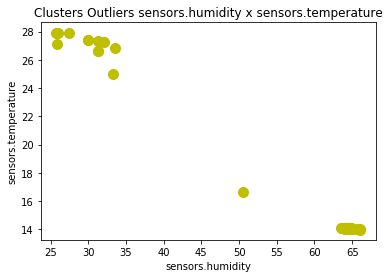

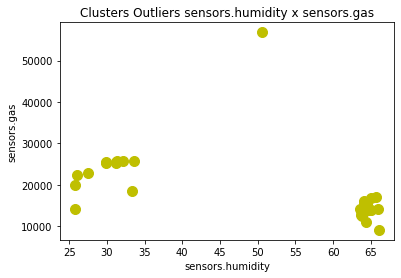

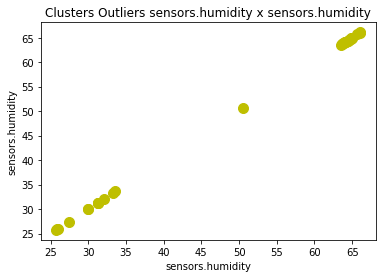

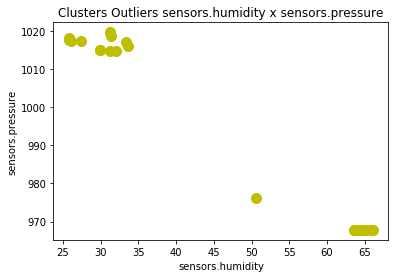

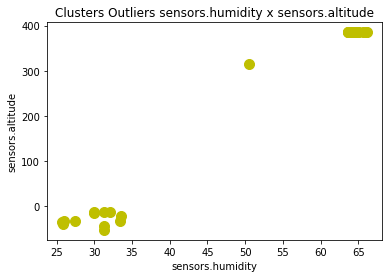

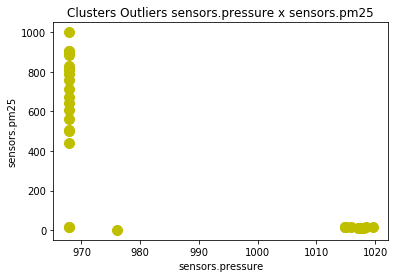

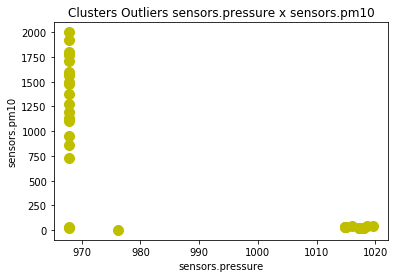

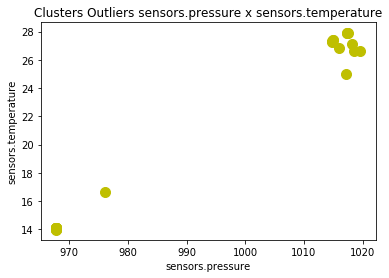

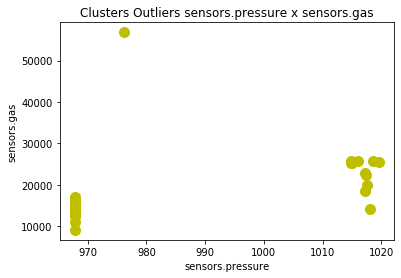

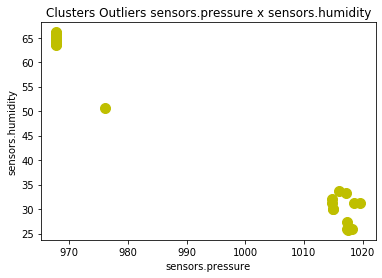

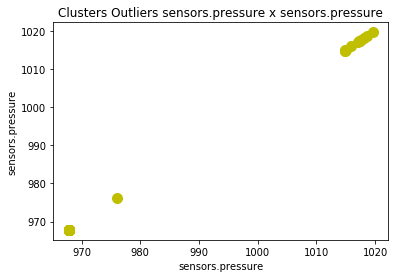

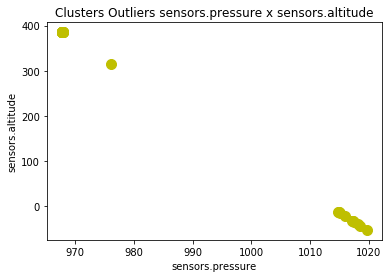

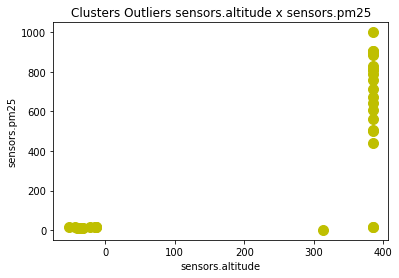

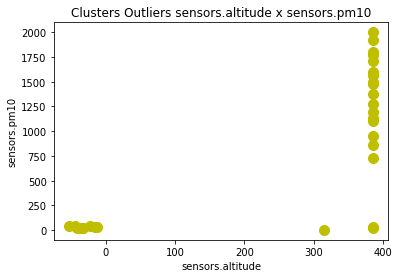

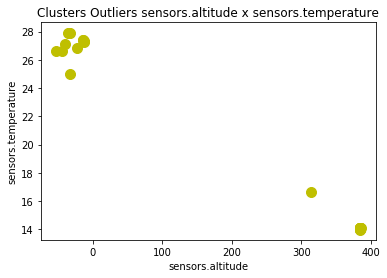

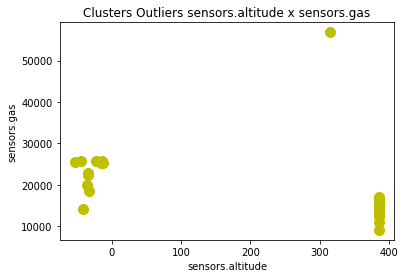

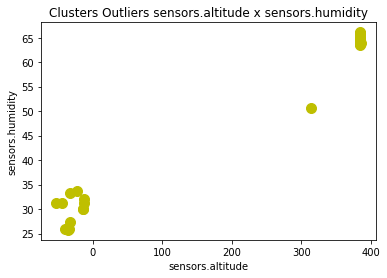

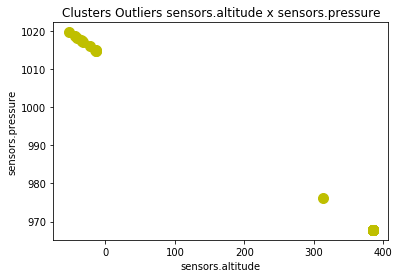

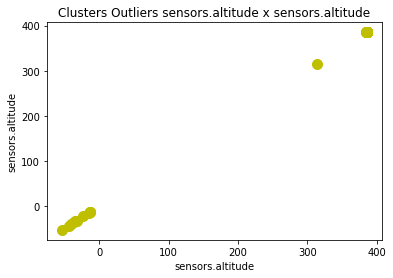

In [57]:
#Anomalias
outlier_index = np.where(y_pred_train == -1)
outlier_values = X_train.iloc[outlier_index]

print(outlier_index)

print("Accuracy:", list(y_pred_test).count(1)/y_pred_test.shape[0])

#Plot Outliers Values
for c1, col1 in enumerate(X_train.columns):
    for c2, col2 in enumerate(X_train.columns):
        plt.scatter(outlier_values[col1], outlier_values[col2], s = 100, c = 'y', label = 'Cluster Outliers')
        plt.title('Clusters Outliers ' + str(col1) + ' x ' + str(col2))
        plt.xlabel(col1)
        plt.ylabel(col2)
        plt.show()

## 5. Model Exportation 

## 5. Conclusions and Validation
Conclusion and validations belongs to this section